In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from matplotlib import pyplot as plt

# 로지스틱회귀분석
# 1. 데이터셋 생성 & 전처리

In [6]:
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#')
df

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.iloc[:,-1].value_counts()

0    500
1    267
Name: 1, dtype: int64

In [8]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [9]:
# csv 파일을 numpy 로 읽어오기
dataset = np.loadtxt('data/pima-indians-diabetes.csv',
                    encoding='utf-8',
                    delimiter=',')
dataset.shape

(768, 9)

In [72]:
# 데이터 분할 : 학습데이터셋(모델학습용) + 시험데이터셋(모델평가용)
x_train = dataset[:650, :-1]
y_train = dataset[:650, -1]
x_test = dataset[650:, :-1]
y_test = dataset[650:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((650, 8), (650,), (118, 8), (118,))

## 2. 모델구성

In [12]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [19]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['binary_accuracy'])

In [23]:
%%time
hist = model.fit(x_train, y_train,
                epochs=200, # 학습횟수
                batch_size=350,  # 한번에 읽어드리는 데이터 양
                # validation_data=[x_test, y_test]
                # validation_split=0.1,
                 verbose=0 # 학습로그 출력 여부 (0: 이면 출력을 안하고 1이면 한다)
                )

CPU times: total: 1.31 s
Wall time: 784 ms


## 5. 모델 평가하기(학습과정 보기, 평가)

In [24]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

ValueError: x, y, and format string must not be None

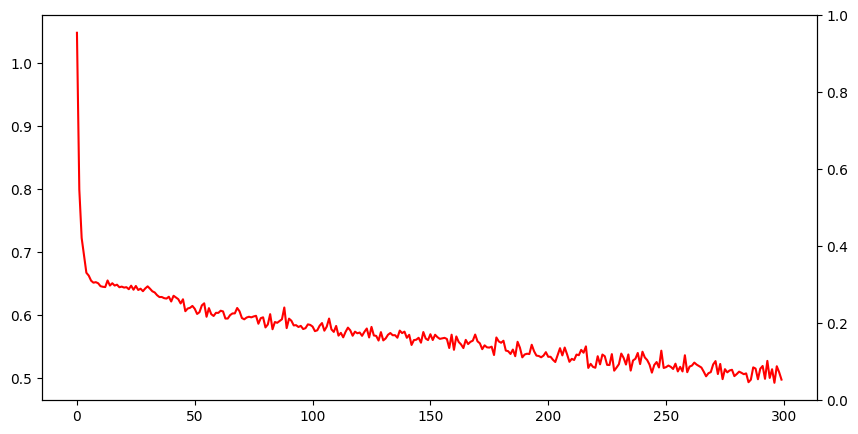

In [132]:
# 학습과정 표시(학습데이터에 대한 loss 와 accuracy)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history.get('binary_accuracy'),'b')

In [29]:
# 평가하기
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 24.8128 - binary_accuracy: 0.0911


[24.81279945373535, 0.09110169857740402]

# 혼동행렬
- 테스트 데이터 셋의 실제값과 예측값으로 작성된 교차표

In [50]:
# 실제값 : y_test
# 예측값
y_hat=(model.predict(x_test)>=0.5).astype(float)
y_hat[:5]

4/4 [==============================] - 0s 2ms/step


array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [77]:
y_test[:5]


array([0., 0., 0., 0., 0.])

In [76]:
TN = 0  # 0을 0으로 예측한 경우의 수(T)
FP = 0  # 0을 1로 예측한 경우의 수(F)
FN = 0  # 1을 0으로 예측한 경우의 수(F)
TP = 0  # 1을 1로 예측한 경우의 수(T)
print(y_test.shape, y_hat.shape)
for y, h in zip(y_test, y_hat.reshape(-1)):
    if y==0 and h==0:
        TN += 1
    elif y==0 and h==1:
        FP += 1
    elif y==1 and h==0:
        FN += 1
    else:
        TP += 1
print(TN, FP)
print(FN, TP)

(118,) (118, 1)
62 11
28 17


In [74]:
ctap = pd.crosstab(y_test, y_hat.reshape(-1))
ctap.index.name = '실제값'
ctap.columns.name='예측값'
ctap
pd.crosstab(y_test,
           y_hat.reshape(-1),
           rownames=['실제값'],
           colnames=['예측값'])

예측값,0.0,1.0
실제값,,
0.0,62,11
1.0,28,17


In [75]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,
                y_hat.reshape(-1))

array([[62, 11],
       [28, 17]], dtype=int64)

In [79]:
print('acc:',(TN+TP)/(TN+FP+FN+TP))
print('recall:',(TP)/(FN+TP))
print('precision:', (TP)/(FP+TP))

acc: 0.6694915254237288
recall: 0.37777777777777777
precision: 0.6071428571428571


## 6. 모델 사용

In [81]:
x_test[0]

array([  1.   ,  91.   ,  54.   ,  25.   , 100.   ,  25.2  ,   0.234,
        23.   ])

In [83]:
model.predict(np.array([[  1.   ,  91.   ,  54.   ,  25.   , 100.   ,  25.2  ,   0.234,
        23.   ]]))

1/1 [==============================] - 0s 23ms/step


array([[0.2762496]], dtype=float32)

In [84]:
int(model.predict(np.array([[  1.   ,  91.   ,  54.   ,  25.   , 100.   ,  25.2  ,   0.234,
        23.   ]])))

1/1 [==============================] - 0s 21ms/step


0

# 분류분석
1. 데이터셋 생성 및 전처리 : 훈련셋(600), 검증셋(100), 테스트셋(68)
2. 모델생성(input, output) " 출력층 softmax
3. 모델학습 설정 : loss="categorical_crossentropy, metrics=['accuracy']
4. 모델 학습 : 훈련셋과 검증셋
5. 모델 평가: 그래프(hist.history), 평가(테스트셋), 교차표(테스트셋)
6. 모델 사용:
0 99.2
1 0.8

## 데이터 셋 정리

In [85]:
dataset = np.loadtxt('data/pima-indians-diabetes.csv',
                    encoding = 'utf-8',
                    delimiter=',')
dataset.shape

(768, 9)

In [87]:
x_train = dataset[:600, :-1]
y_train = dataset[:600, -1]
x_val = dataset[600:700, :-1]
y_val = dataset[600:700, -1]
x_test = dataset[700:, :-1]
y_test = dataset[700:, -1]
x_train.shape, y_train.shape

((600, 8), (600,))

In [88]:
# 타겟변수의 원핫인코딩 분류 분석

In [98]:
print(y_train[:5])
print(utils.to_categorical(y_train))
Y_train = utils.to_categorical(y_train)
Y_val = utils.to_categorical(y_val)
Y_test = utils.to_categorical(y_test)

[1. 0. 1. 0. 1.]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


## 모델생성
 - 좌적합을 줄이는 dropout 추가

In [110]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2)) # 과적합을 해결
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=16, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 16)                1040      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 8)                

## 3. 학습과정 설정

In [111]:
model.compile(loss = 'categorical_crossentropy',
             optimizer='nadam',
             metrics=['accuracy'])

## 4. 모델 학습

In [112]:
hist = model.fit(x_train, Y_train,
                epochs=300,
                validation_data=(x_val, Y_val),
                verbose=1)

Epoch 1/300
19/19 [==============================] - 1s 12ms/step - loss: 1.0485 - accuracy: 0.3467 - val_loss: 0.8010 - val_accuracy: 0.3300
Epoch 2/300
19/19 [==============================] - 0s 4ms/step - loss: 0.7996 - accuracy: 0.3617 - val_loss: 0.7091 - val_accuracy: 0.3300
Epoch 3/300
19/19 [==============================] - 0s 4ms/step - loss: 0.7225 - accuracy: 0.4767 - val_loss: 0.6770 - val_accuracy: 0.6700
Epoch 4/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5150 - val_loss: 0.6587 - val_accuracy: 0.6700
Epoch 5/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6673 - accuracy: 0.6100 - val_loss: 0.6476 - val_accuracy: 0.6700
Epoch 6/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6628 - accuracy: 0.6283 - val_loss: 0.6415 - val_accuracy: 0.6700
Epoch 7/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.6383 - val_loss: 0.6377 - val_accuracy: 0.6700
Epoch 8/300


Epoch 59/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5987 - accuracy: 0.6783 - val_loss: 0.6216 - val_accuracy: 0.6600
Epoch 60/300
19/19 [==============================] - 0s 4ms/step - loss: 0.6037 - accuracy: 0.6650 - val_loss: 0.6088 - val_accuracy: 0.7100
Epoch 61/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6036 - accuracy: 0.6667 - val_loss: 0.6146 - val_accuracy: 0.6500
Epoch 62/300
19/19 [==============================] - 0s 4ms/step - loss: 0.6070 - accuracy: 0.6633 - val_loss: 0.6215 - val_accuracy: 0.5600
Epoch 63/300
19/19 [==============================] - 0s 4ms/step - loss: 0.6059 - accuracy: 0.6333 - val_loss: 0.6238 - val_accuracy: 0.5500
Epoch 64/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5946 - accuracy: 0.6450 - val_loss: 0.6211 - val_accuracy: 0.5800
Epoch 65/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5946 - accuracy: 0.6583 - val_loss: 0.6228 - val_accuracy: 0.5900
Epoch 

19/19 [==============================] - 0s 3ms/step - loss: 0.5459 - accuracy: 0.7267 - val_loss: 0.5767 - val_accuracy: 0.6600
Epoch 174/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5520 - accuracy: 0.7200 - val_loss: 0.5813 - val_accuracy: 0.6500
Epoch 175/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5489 - accuracy: 0.7200 - val_loss: 0.5766 - val_accuracy: 0.6400
Epoch 176/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5485 - accuracy: 0.7167 - val_loss: 0.5768 - val_accuracy: 0.6300
Epoch 177/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5499 - accuracy: 0.7067 - val_loss: 0.5767 - val_accuracy: 0.6500
Epoch 178/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5366 - accuracy: 0.7183 - val_loss: 0.5792 - val_accuracy: 0.6600
Epoch 179/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5645 - accuracy: 0.7017 - val_loss: 0.5818 - val_accuracy: 0.6600
Epoch 180/300

19/19 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.7400 - val_loss: 0.5466 - val_accuracy: 0.7100
Epoch 288/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5171 - accuracy: 0.7333 - val_loss: 0.5394 - val_accuracy: 0.7700
Epoch 289/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.7083 - val_loss: 0.5368 - val_accuracy: 0.7500
Epoch 290/300
19/19 [==============================] - 0s 4ms/step - loss: 0.4982 - accuracy: 0.7667 - val_loss: 0.5366 - val_accuracy: 0.7100
Epoch 291/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5150 - accuracy: 0.7317 - val_loss: 0.5363 - val_accuracy: 0.7400
Epoch 292/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5193 - accuracy: 0.7383 - val_loss: 0.5268 - val_accuracy: 0.7700
Epoch 293/300
19/19 [==============================] - 0s 4ms/step - loss: 0.4989 - accuracy: 0.7417 - val_loss: 0.5294 - val_accuracy: 0.7600
Epoch 294/300

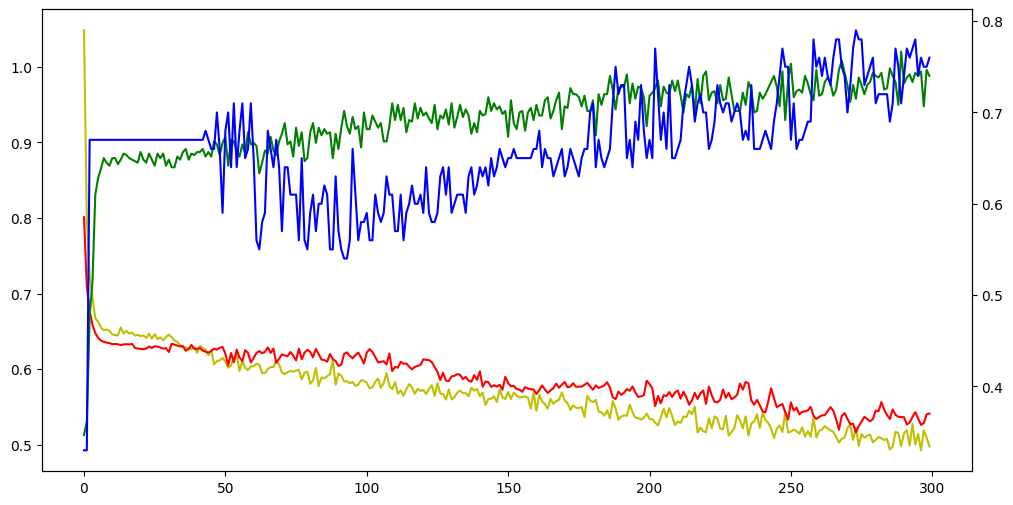

In [114]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'],'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'],'b', label='val accuracy')
loss_ax.set_xlaber('epochs')
loss_ax.set_ylaber('loss')
acc_ax.set_xlaber('accuracy')
loss_ax.legend(loc)

## 6. 모델 평가와 교차표

In [116]:
loss, accuracy = model.evaluate(x_test, Y_test, verbose=0)
print(loss, accuracy)

0.6134990453720093 0.75


In [121]:
# 교차표
Y_test.argmax(axis=1)

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [122]:
y_hat = model.predict(x_test).argmax(axis=1)
y_hat

3/3 [==============================] - 0s 2ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0], dtype=int64)

In [123]:
pd.crosstab(y_test, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1
실제값,,
0.0,38,3
1.0,14,13


In [124]:
confusion_matrix(y_test, y_hat)

array([[38,  3],
       [14, 13]], dtype=int64)

## 7 모델 저장 및 사용

In [126]:
from tensorflow.keras.models import save_model, load_model
save_model(model, 'model/06_pima.h5')

In [127]:
model2 = load_model('model/06_pima.h5')

In [129]:
x_test[1]

array([  6.   , 125.   ,  78.   ,  31.   ,   0.   ,  27.6  ,   0.565,
        49.   ])

In [131]:
pred = model2.predict([[  6.   , 125.   ,  78.   ,  31.   ,   0.   ,  27.6  ,   0.565,
        49.   ]])
pred.argmax(axis=1)

1/1 [==============================] - 0s 43ms/step


array([0], dtype=int64)